# Naive Bayes on Fetch_20news Dataset

### Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics, datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Data Preprocessing

Split and transform dataset.

In [3]:
def Data_Preprocess():
    newsgroups_train = fetch_20newsgroups(subset='train')
    newsgroups_test = fetch_20newsgroups(subset='test')
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(newsgroups_train.data)
    vectors_test = vectorizer.transform(newsgroups_test.data)
    return vectors,vectors_test,newsgroups_test,newsgroups_train

### Model Evaluation

Train naive bayes model and calculate metrics

In [4]:
def experimental_evaluation(vectors,vectors_test,newsgroups_test,newsgroups_train):
    final_a=[]
    accuracy_score=[]
    recall_score=[]
    precision_score=[]
    f1_score=[]
    print ('Evaluation of hyper-parameter: alpha \n ')
    for i in range (1,35):
        a = i/10
        clf = MultinomialNB(alpha = a)
        clf.fit(vectors, newsgroups_train.target)
        pred = clf.predict(vectors_test)
        print ('a = ',a)
        print ('accuracy_score =', metrics.accuracy_score(newsgroups_test.target, pred))
        print ('recall_score =', metrics.recall_score(newsgroups_test.target, pred,average='macro'))
        print ('precision_score =', metrics.precision_score(newsgroups_test.target, pred,average='macro'))
        print ('f1_score =', metrics.f1_score(newsgroups_test.target, pred, average='macro'),'\n')
        if metrics.f1_score(newsgroups_test.target, pred, average='macro') < 0.70:
            final_a.append(a)
            accuracy_score.append(metrics.accuracy_score(newsgroups_test.target, pred))
            recall_score.append(metrics.recall_score(newsgroups_test.target, pred,average='macro'))
            precision_score.append(metrics.precision_score(newsgroups_test.target, pred,average='macro'))
            f1_score.append(metrics.f1_score(newsgroups_test.target, pred, average='macro'))
    return final_a[0],accuracy_score[0],recall_score[0],precision_score[0],f1_score[0]

### Plot Heat Map

In [5]:
def Plot_Heatmap(vectors,vectors_test,newsgroups_test,newsgroups_train,a,accuracy,recall,precision,f1):
    clf = MultinomialNB(alpha = a)
    clf.fit(vectors, newsgroups_train.target)
    pred = clf.predict(vectors_test)
    mat = confusion_matrix(newsgroups_test.target, pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu",cbar=False,
                xticklabels=newsgroups_train.target_names, yticklabels=newsgroups_train.target_names)

    plt.title('Multinomial NB - Confusion matrix (a = {}) [ Prec = {}, Rec = {}, F1 = {} ]'.format(a, precision, recall,f1))
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.savefig('Heat_Map.pdf',bbox_inches = 'tight')

### All Merged

Evaluation of hyper-parameter: alpha 
 
a =  0.1
accuracy_score = 0.8263409453000531
recall_score = 0.8139733734816101
precision_score = 0.8393943776449075
f1_score = 0.81388938732554 

a =  0.2
accuracy_score = 0.8189060010621348
recall_score = 0.8051784852059749
precision_score = 0.8394478621603747
f1_score = 0.8047134474903199 

a =  0.3
accuracy_score = 0.8106744556558683
recall_score = 0.7959516452936606
precision_score = 0.8370073372581933
f1_score = 0.7950631370936679 

a =  0.4
accuracy_score = 0.8046999468932554
recall_score = 0.7891826258041011
precision_score = 0.8352233789998932
f1_score = 0.7877661576773165 

a =  0.5
accuracy_score = 0.7977960701009028
recall_score = 0.7817875287853122
precision_score = 0.8318908413911658
f1_score = 0.7799106783033476 

a =  0.6
accuracy_score = 0.79182156133829
recall_score = 0.7754212271307456
precision_score = 0.8301964139609345
f1_score = 0.7738473781497937 

a =  0.7
accuracy_score = 0.7871747211895911
recall_score = 0.77062148104703

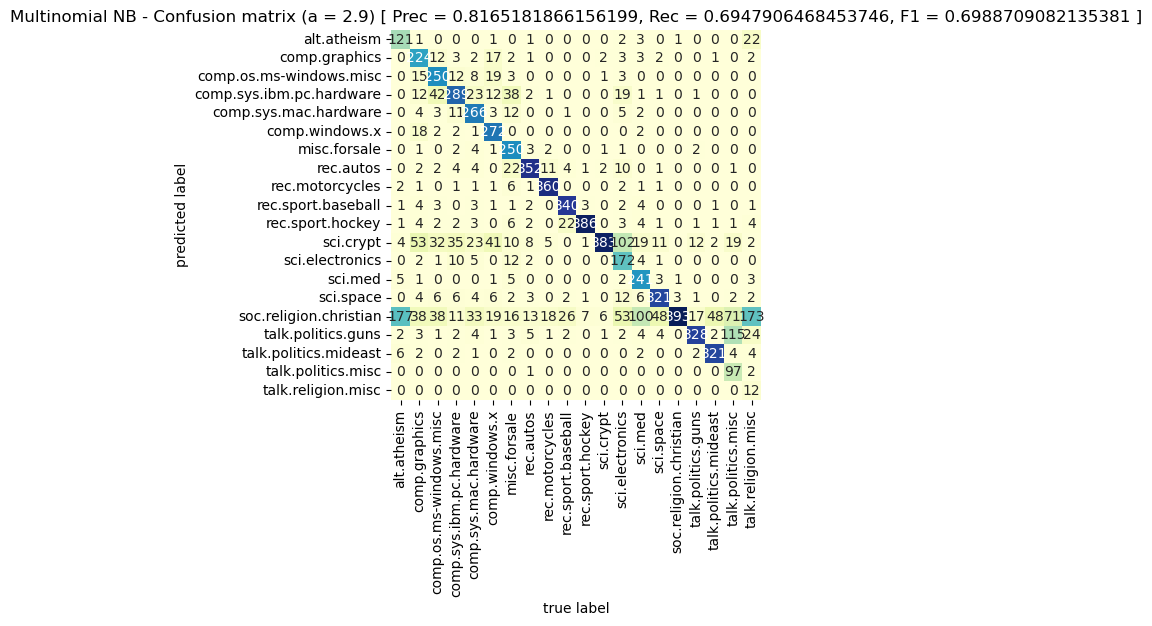

In [6]:
vectors,vectors_test,newsgroups_test,newsgroups_train = Data_Preprocess()
a,accuracy,recall,precision,f1=experimental_evaluation(vectors,vectors_test,newsgroups_test,newsgroups_train)
Plot_Heatmap(vectors,vectors_test,newsgroups_test,newsgroups_train,a,accuracy,recall,precision,f1)